
# Ground station observations (X_station)

This notebook will help you explore the ground station observations. Hundreds of observation stations are built throughout the French territory and fitted with several weather sensors (temperature, wind...). 
Each parameter is measured every 1 hour and each file contains data for the geographical area 'NW' for North-West of France.  

For more information about data, cf [documentation](https://meteofrance.github.io/meteonet/english/data/ground-observations/).

## Data overview

### Metadata parameters

* **number_sta** : ground station number

The date parameter is a datetime object with the format 'YYYY-MM-DD HH:mm:ss'.

### Meteorological parameters

* **dd** : wind direction in degrees

* **ff** : wind speed in m.s<sup>-1</sup>

* **precip** : precipitation during the reporting period in kg.m<sup>2</sup>

* **hu** : humidity in %

* **td** : dew point temperature** in Kelvin

* **t** : temperature in Kelvin

** : temperature for which it is needed to refresh an air volume at constant pressure and humidity to become it saturated (i.e. condensation temperature)

# Note

<font size="4.5">To use <span style="color:blue">**Cartopy**</span>, a library to plot data with basemaps (see cells below), it is necessary to <span style="color:red">activate the internet connection</span> of that notebook (in edit mode, you can find on the right column, in the *Settings* section, a row entitled *Internet*, put the slider bar on **on**).  </font>

<font size="4.5">If it does not still work, check you use the latest environment (in the *Settings* section, click on **Preferences**). </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#open the file with station coordinates (latitude/longitude)

#coords_fname  = '/kaggle/input/defi-ia-2022-test/Other/Other/stations_coordinates.csv'
coords_fname = '/Users/qdouzery/Desktop/INSAT_Defi-IA-2022/Data/Other/stations_coordinates.csv'
coords = pd.read_csv(coords_fname)
display(coords)

,number_sta,lat,lon,height_sta
0,86118001,46.477,0.985,120.0
1,86149001,46.917,0.025,60.0
2,56081003,48.050,-3.660,165.0
3,53215001,47.790,-0.710,63.0
4,22135001,48.550,-3.380,148.0
...,...,...,...,...
320,86137003,47.035,0.098,96.0
321,86165005,46.412,0.841,153.0
322,86273001,46.464,1.042,121.0
323,91200002,48.526,1.993,116.0


In [3]:
param = 'hu'
fname = '/kaggle/input/defi-ia-2022-test/Train/Train/X_station_train.csv'
df = pd.read_csv(fname,parse_dates=['date'],infer_datetime_format=True)

Let's have a look at the dataframe !

In [4]:
display(df.head())
display(df.tail())

,number_sta,date,t,dd,td,ff,hu,precip,Id
0,14066001,2016-01-01 00:00:00,279.28,200.0,277.97,3.05,91.4,0.0,14066001_1_0_0
1,14066001,2016-01-01 01:00:00,278.76,190.0,277.45,2.57,91.4,0.0,14066001_1_0_1
2,14066001,2016-01-01 02:00:00,278.27,181.0,277.02,2.26,91.7,0.0,14066001_1_0_2
3,14066001,2016-01-01 03:00:00,277.98,159.0,276.95,2.62,93.0,0.0,14066001_1_0_3
4,14066001,2016-01-01 04:00:00,277.32,171.0,276.72,2.99,95.9,0.0,14066001_1_0_4


,number_sta,date,t,dd,td,ff,hu,precip,Id
4392997,91200002,2017-12-30 19:00:00,286.22,240.0,283.68,4.25,84.6,0.0,91200002_12_728_19
4392998,91200002,2017-12-30 20:00:00,285.99,231.0,283.85,3.90,86.8,0.0,91200002_12_728_20
4392999,91200002,2017-12-30 21:00:00,285.79,228.0,284.25,4.56,90.3,0.0,91200002_12_728_21
4393000,91200002,2017-12-30 22:00:00,285.93,230.0,283.63,4.65,85.9,0.0,91200002_12_728_22
4393001,91200002,2017-12-30 23:00:00,285.96,228.0,283.18,3.89,83.1,0.0,91200002_12_728_23


## Plot a parameter for a given date 

Let's start by selecting a date and time and displaying a subpart of the dataframe.

In [5]:
date = '2017-01-01T06:00:00'
d_sub = df[df['date'] == date]

display(d_sub.head())
display(d_sub.tail())

,number_sta,date,t,dd,td,ff,hu,precip,Id
8790,14066001,2017-01-01 06:00:00,274.27,193.0,273.75,4.85,96.4,0.0,14066001_1_366_6
26286,14126001,2017-01-01 06:00:00,271.45,NaN,271.35,NaN,99.0,0.0,14126001_1_365_6
43782,14137001,2017-01-01 06:00:00,273.68,195.0,273.45,4.10,98.4,0.0,14137001_1_365_6
61278,14216001,2017-01-01 06:00:00,271.41,207.0,271.01,2.84,97.0,0.0,14216001_1_365_6
78774,14296001,2017-01-01 06:00:00,272.00,NaN,NaN,NaN,NaN,0.0,14296001_1_365_6


,number_sta,date,t,dd,td,ff,hu,precip,Id
4314180,86097001,2017-01-01 06:00:00,273.75,NaN,NaN,NaN,NaN,0.0,86097001_1_365_6
4331729,86137003,2017-01-01 06:00:00,270.94,0.0,270.66,0.0,98.1,0.0,86137003_1_365_6
4349280,86165005,2017-01-01 06:00:00,273.62,NaN,273.62,NaN,100.0,0.0,86165005_1_365_6
4366776,86272002,2017-01-01 06:00:00,271.90,NaN,NaN,NaN,NaN,0.0,86272002_1_365_6
4384272,91200002,2017-01-01 06:00:00,268.61,NaN,268.21,NaN,97.0,0.0,91200002_1_365_6


In [6]:
#get the station coordinates for the selected date
d_sub = d_sub.merge(coords, on=['number_sta'], how='left')
d_sub

,number_sta,date,t,dd,td,ff,hu,precip,Id,lat,lon,height_sta
0,14066001,2017-01-01 06:00:00,274.27,193.0,273.75,4.85,96.4,0.0,14066001_1_366_6,49.334,-0.431,2.0
1,14126001,2017-01-01 06:00:00,271.45,NaN,271.35,NaN,99.0,0.0,14126001_1_365_6,49.145,0.042,125.0
2,14137001,2017-01-01 06:00:00,273.68,195.0,273.45,4.10,98.4,0.0,14137001_1_365_6,49.180,-0.456,67.0
3,14216001,2017-01-01 06:00:00,271.41,207.0,271.01,2.84,97.0,0.0,14216001_1_365_6,48.928,-0.149,155.0
4,14296001,2017-01-01 06:00:00,272.00,NaN,NaN,NaN,NaN,0.0,14296001_1_365_6,48.795,-1.037,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...
250,86097001,2017-01-01 06:00:00,273.75,NaN,NaN,NaN,NaN,0.0,86097001_1_365_6,46.321,0.410,122.0
251,86137003,2017-01-01 06:00:00,270.94,0.0,270.66,0.00,98.1,0.0,86137003_1_365_6,47.035,0.098,96.0
252,86165005,2017-01-01 06:00:00,273.62,NaN,273.62,NaN,100.0,0.0,86165005_1_365_6,46.412,0.841,153.0
253,86272002,2017-01-01 06:00:00,271.90,NaN,NaN,NaN,NaN,0.0,86272002_1_365_6,46.839,0.457,120.0


Now, let's plot the data !

### Simple scatter plot

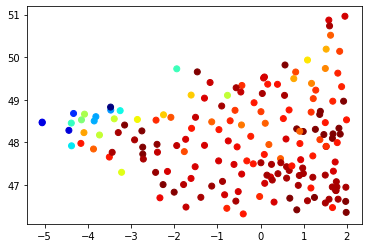

In [7]:
plt.scatter(d_sub['lon'], d_sub['lat'], c=d_sub[param], cmap='jet')
plt.show()

### Plot with Cartopy

In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

/opt/conda/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/conda/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


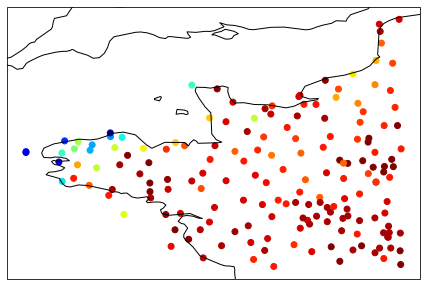

In [9]:
# Coordinates of studied area boundaries (in °N and °E)
lllat = 46.25  #lower left latitude
urlat = 51.896  #upper right latitude
lllon = -5.842  #lower left longitude
urlon = 2  #upper right longitude
extent = [lllon, urlon, lllat, urlat]

fig = plt.figure(figsize=(9,5))

# Select projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
plt.scatter(d_sub['lon'], d_sub['lat'], c=d_sub[param], cmap='jet')  # Plot

# Add coastlines and borders
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

# Adjust the plot to the area we defined 
#/!\# this line causes a bug of the kaggle notebook and clears all the memory. That is why this line is commented and so
# the plot is not completely adjusted to the data
# Show only the area we defined
#ax.set_extent(extent)

plt.show()